In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('modelingv2.csv')

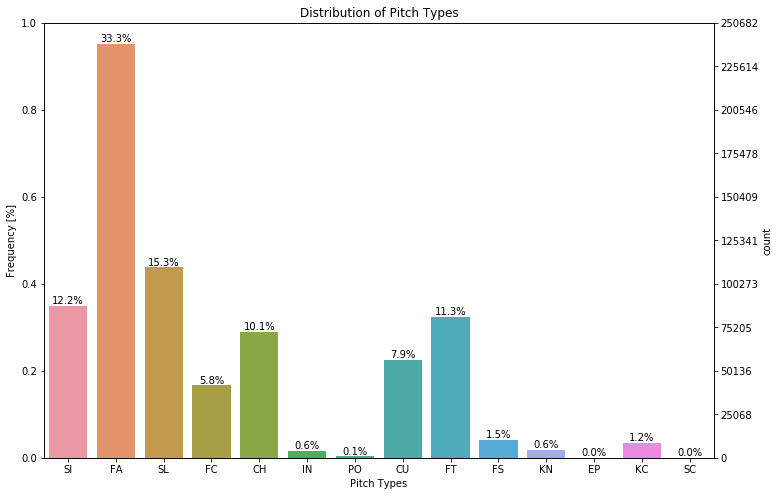

In [3]:
# Distribution of Pitch Types with Fastball being the most popular pitch
# Also note FT is a Two Seam Fastball which mean almost 50% of pitches are fastballs

ncount = len(df)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="pitch_type", data=df)
plt.title('Distribution of Pitch Types')
plt.xlabel('Pitch Types')

ax2=ax.twinx()

ax2.yaxis.tick_left()
ax.yaxis.tick_right()

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
plt.show()

In [4]:
df['throwing_arm'] = df['right_handed_pitcher']
df['throwing_arm'] = df['throwing_arm'].replace(1, 'R')
df['throwing_arm'] = df['throwing_arm'].replace(0, 'L')

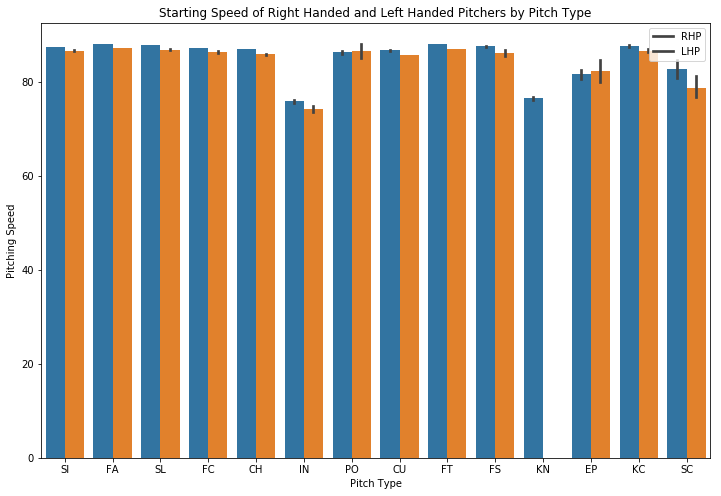

In [5]:
# Right Handed Hitters Throw Faster in all but 2 Categories and both those
# pitches are very low frequency (EP & PO)

plt.figure(figsize=(12,8))
plt.title('Starting Speed of Right Handed and Left Handed Pitchers by Pitch Type')
sns.barplot(x='pitch_type', y='start_speed', hue='throwing_arm', data=df)
plt.xlabel('Pitch Type')
plt.ylabel('Pitching Speed')
plt.legend(labels =['RHP', 'LHP'])
plt.show()

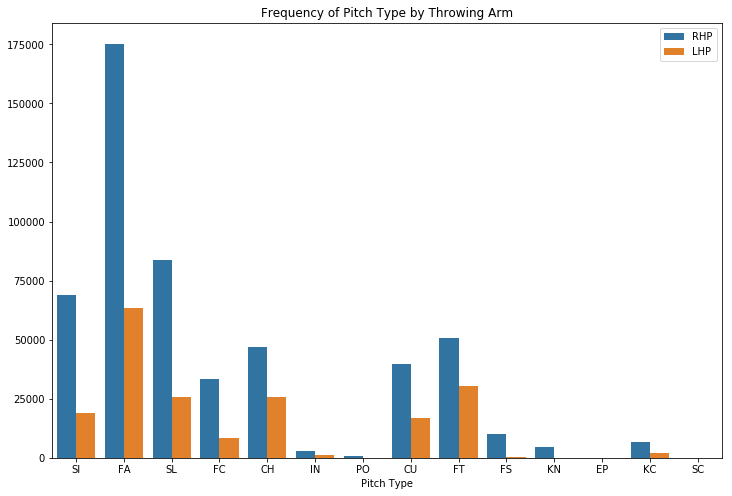

In [6]:
# Very High Frequency of RHP throwing Fastballs 

plt.figure(figsize=(12,8))
plt.title('Frequency of Pitch Type by Throwing Arm')
sns.countplot(x='pitch_type', hue='throwing_arm', data=df)
plt.xlabel('Pitch Type')
plt.ylabel('')
plt.legend(labels =['RHP', 'LHP'])
plt.show()